In [176]:
# import all necessary tools
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler



In [177]:
# load dataset
df = pd.read_csv("../ml/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [178]:
# check null 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [179]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [180]:
# Apply Label Encoding for sex
sex_label_encoder = LabelEncoder()
df['sex'] = sex_label_encoder.fit_transform(df['sex'])
 

In [181]:
# apply label encoding for smoker
smoker_label_encoding = LabelEncoder()
df['smoker'] = smoker_label_encoding.fit_transform(df['smoker'])

In [182]:
# apply one hot encoding for region
region_one_hot_encoding = OneHotEncoder()
reg_encoder = region_one_hot_encoding.fit_transform(df[['region']]).toarray()
reg_encoder

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [183]:
reg_encoder_column = region_one_hot_encoding.get_feature_names_out(['region'])

reg_df = pd.DataFrame(reg_encoder, columns=reg_encoder_column)

# drop region column
df.drop('region', axis=1, inplace=True)

In [184]:
df = pd.concat([df, reg_df], axis=1)
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int32  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int32  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   float64
 7   region_northwest  1338 non-null   float64
 8   region_southeast  1338 non-null   float64
 9   region_southwest  1338 non-null   float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 94.2 KB


In [186]:
# save file
with open("sex_label_encoder.pkl", 'wb') as file:
    pickle.dump(sex_label_encoder, file)

with open('smoker_label_encoding.pkl', 'wb') as file:
    pickle.dump(smoker_label_encoding, file)

with open("region_one_hot_encoding.pkl", 'wb') as file:
    pickle.dump(region_one_hot_encoding, file)

In [187]:
# Create X and y
X = df.drop("charges", axis=1)
y = df['charges']

# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

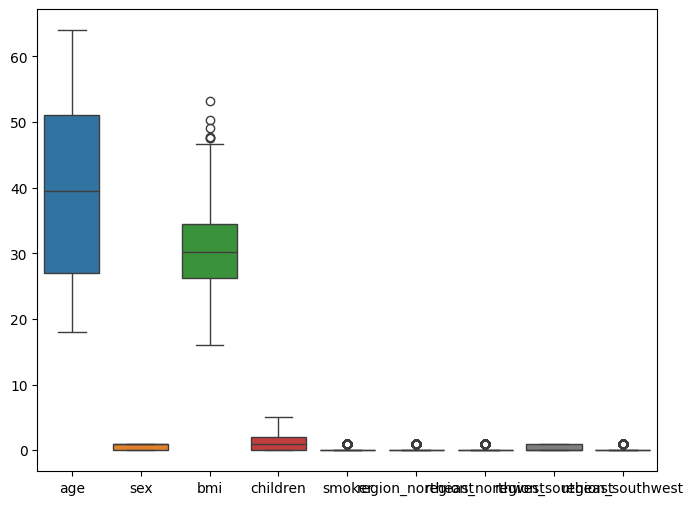

In [189]:
# before apply standaredScaler
plt.figure(figsize=(8, 6))
sns.boxplot(data=X_train)
plt.show()

In [190]:
# apply standaredScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

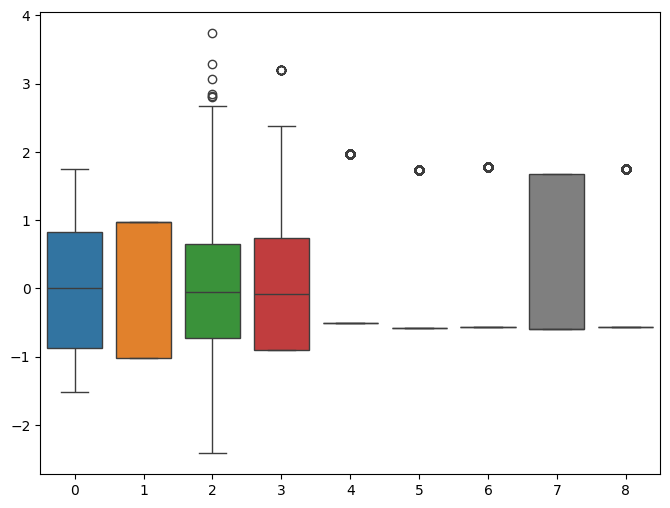

In [191]:
# After apply standardScaler
plt.figure(figsize=(8, 6))
sns.boxplot(data=X_train)
plt.show()

In [192]:
# save scaler file
with open("scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)

## ANN Implementation

In [193]:
# Init ANN
ann = Sequential()

In [194]:
X_train.shape[1]

9

In [195]:
# Adding first hidden layer
ann.add(Dense(64, activation="relu", input_shape=(X_train.shape[1], )))

In [196]:
# Adding second hidden layer
ann.add(Dense(32, activation="relu"))

In [197]:
# output layer
ann.add(Dense(1))

In [198]:
# compile the ann
ann.compile(optimizer="adam", loss="mean_absolute_error", metrics=["mae"])

In [199]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [200]:
# Setup callback 
early_stoping_callback = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [201]:
# train the model
history = ann.fit(
    X_train,
    y_train,
    validation_data=[X_test, y_test],
    epochs=100,
    callbacks=[early_stoping_callback]
)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 13344.8887 - mae: 13344.8887 - val_loss: 12965.6436 - val_mae: 12965.6436
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13341.4590 - mae: 13341.4590 - val_loss: 12960.8730 - val_mae: 12960.8721
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13334.8379 - mae: 13334.8379 - val_loss: 12951.6689 - val_mae: 12951.6689
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13322.4551 - mae: 13322.4551 - val_loss: 12935.0674 - val_mae: 12935.0674
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13300.9121 - mae: 13300.9121 - val_loss: 12907.0674 - val_mae: 12907.0674
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13266.1836 - mae: 13266.1836 - val_loss: 12863.8750 - val_mae: 12863.8750
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13214.6387 - mae: 13214.6387 - val_loss: 1280

In [202]:
# save model
ann.save('model.h5')

d:\machine-learning\deep-learning-project\Medical-Cost-ANN-Regression-Problem\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [203]:
y_pred = ann.predict(X_test)

9/9 [==============================] - 0s 1ms/step


In [204]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7686269312706692

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


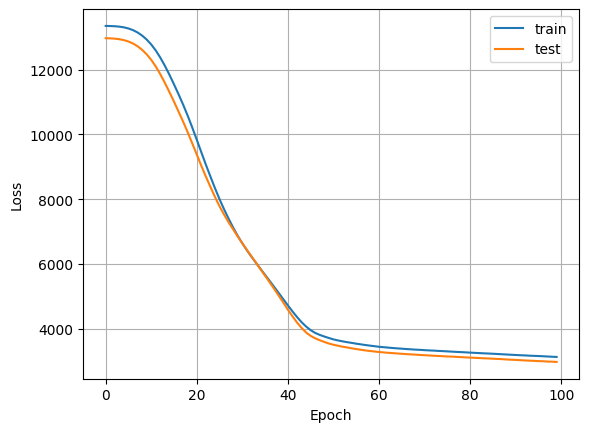

In [205]:
# lets plot for model loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['train', 'test'], loc='best')
plt.show()

### Prediction for new data

In [206]:
input_data = {
    "age": 20,
    "sex": "female",
    "bmi": 33.55,
    "children": 2,
    "smoker": "yes",
    "region": "southwest"
}

input_df = pd.DataFrame([input_data])

input_df

,age,sex,bmi,children,smoker,region
0,20,female,33.55,2,yes,southwest


In [207]:
# load sex encoding file
with open("sex_label_encoder.pkl", 'rb') as file:
    sex_label_encoder = pickle.load(file)

# load smoker label encoder file
with open("smoker_label_encoding.pkl", 'rb') as file:
    smoker_label_encoding = pickle.load(file)

# load region one hot encoding file
with open("region_one_hot_encoding.pkl", 'rb') as file:
    region_one_hot_encoding = pickle.load(file)

# load standaredScaler file
with open("scaler.pkl", 'rb') as file:
    scaler = pickle.load(file)

# load model file
ann = tf.keras.models.load_model("model.h5")


In [208]:
reg_column = region_one_hot_encoding.get_feature_names_out(['region'])
reg_column

array(['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [209]:
# apply one hot encoding
rego_encoder = region_one_hot_encoding.transform(input_df[['region']]).toarray()
rego_encoder_df = pd.DataFrame(rego_encoder, columns=reg_column)
rego_encoder_df


,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0


In [210]:
# drop the region column
input_df.drop("region", axis=1, inplace=True)

In [211]:
input_df['sex'] = sex_label_encoder.transform(input_df['sex'])
input_df['smoker'] = smoker_label_encoding.transform(input_df['smoker'])

In [212]:
dataframe = pd.concat([input_df, rego_encoder_df], axis=1)

In [213]:
dataframe

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,20,0,33.55,2,1,0.0,0.0,0.0,1.0


In [214]:
input_scaled = scaler.transform(dataframe)

In [215]:
input_scaled

array([[-1.37602074, -1.0246016 ,  0.49492138,  0.73433626,  1.96561348,
        -0.57663083, -0.56079971, -0.59966106,  1.74729228]])

In [216]:
prediction = ann.predict(input_scaled)
new_prediction = prediction[0][0] 
new_prediction 

1/1 [==============================] - 0s 56ms/step


24611.035